Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different
are these results from those of your implementation? Why?


## Using a function PCA from sckit-learn

Load my Image in gray scale

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

(256, 256)


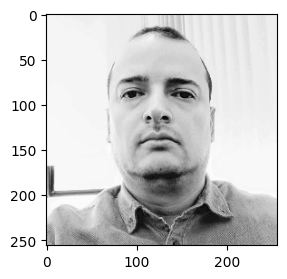

In [2]:

myFile='../pictureFace/myPhotoGray.png'
image_raw = imread(myFile)
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[6,3])
plt.imshow(image_raw,cmap='gray')

### Performing PCA on the image:  
We'll perform PCA on the matrix with all the components

Number of components explaining 95% variance: 14


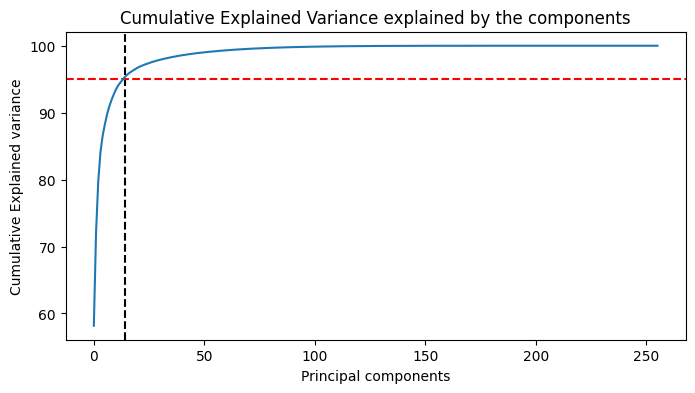

In [3]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_raw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[8,4])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

The latest results indicate that only 14 components can explain 95% of the variance of the image. We can rebuild the image with only 14 components!

### Reconstructing the b/w image with the limited number of components (14)


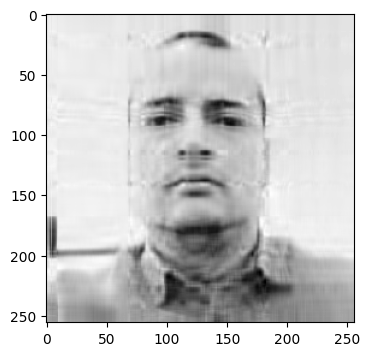

In [4]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_raw))

# Plotting the reconstructed image
plt.figure(figsize=[8,4])
plt.imshow(image_recon,cmap = plt.cm.gray)

What if what we want is to show a progression of the reconstruction of images of certain components?

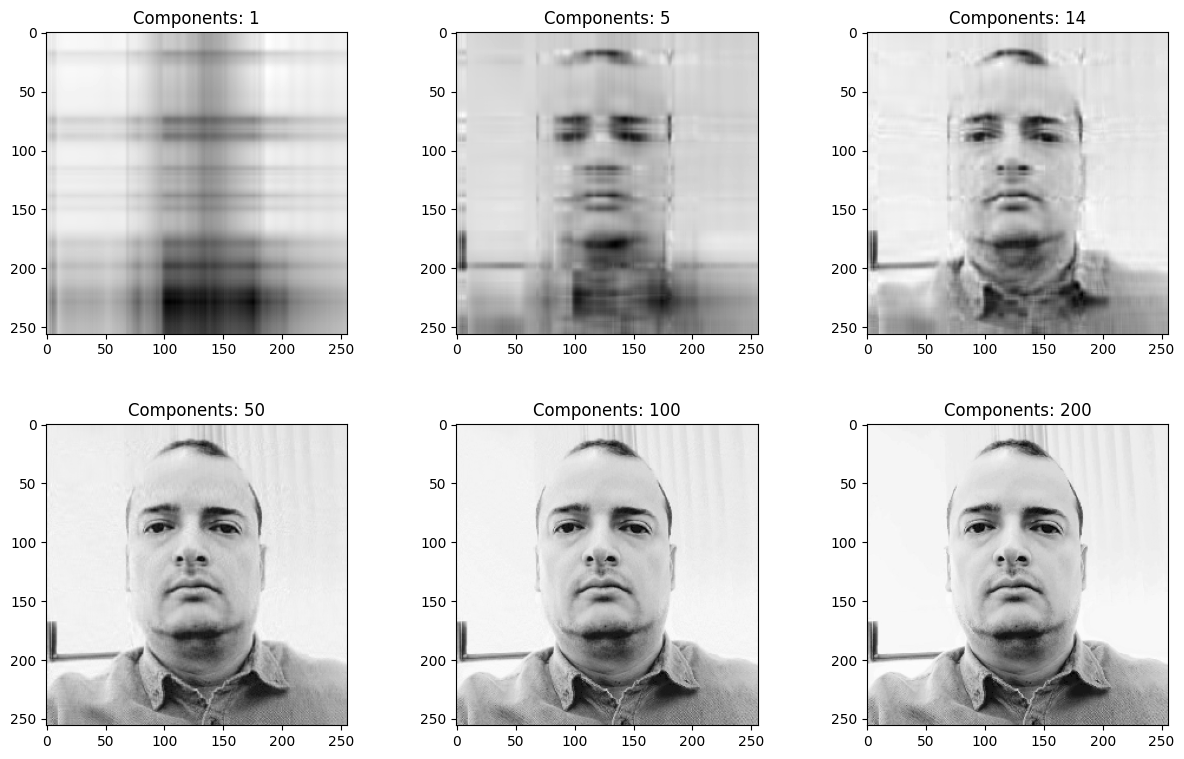

In [5]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_raw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    
ks = [1, 5, 14, 50, 100, 200]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.30)
plt.show()